# 匹配单个字符

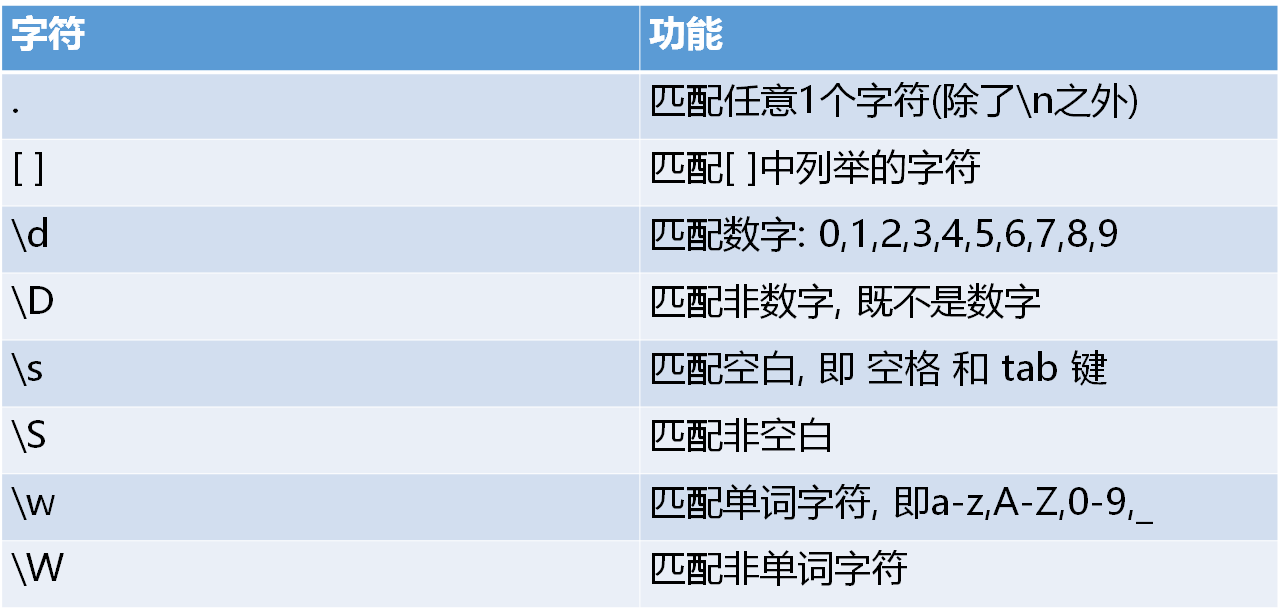

In [2]:
import re

In [ ]:
data1 = re.match(r"哈利波特\d","哈利波特1") # 匹配1个数字
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[\d]","哈利波特1")  #同上
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特.","哈利波特1") # 匹配任意字符，出了换行符
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[1234567]","哈利波特8") # 取1234567里的1个值
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[1234567]","哈利波特7") # 取1234567里的1个值
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[1-7]","哈利波特5") # 同上
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[a-d]","哈利波特b") # 取abcd里的1个值
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[a-d1-7A-Z]","哈利波特H")  #只取a-d/1-7/A-Z中的1个值
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[\w]","哈利波特帅")  # 符合Unicode编码，可以匹配任意字符
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特[\s]","哈利波特 aaaa")  # 匹配空格和tab键
print(data1.group())

# 匹配多个字符

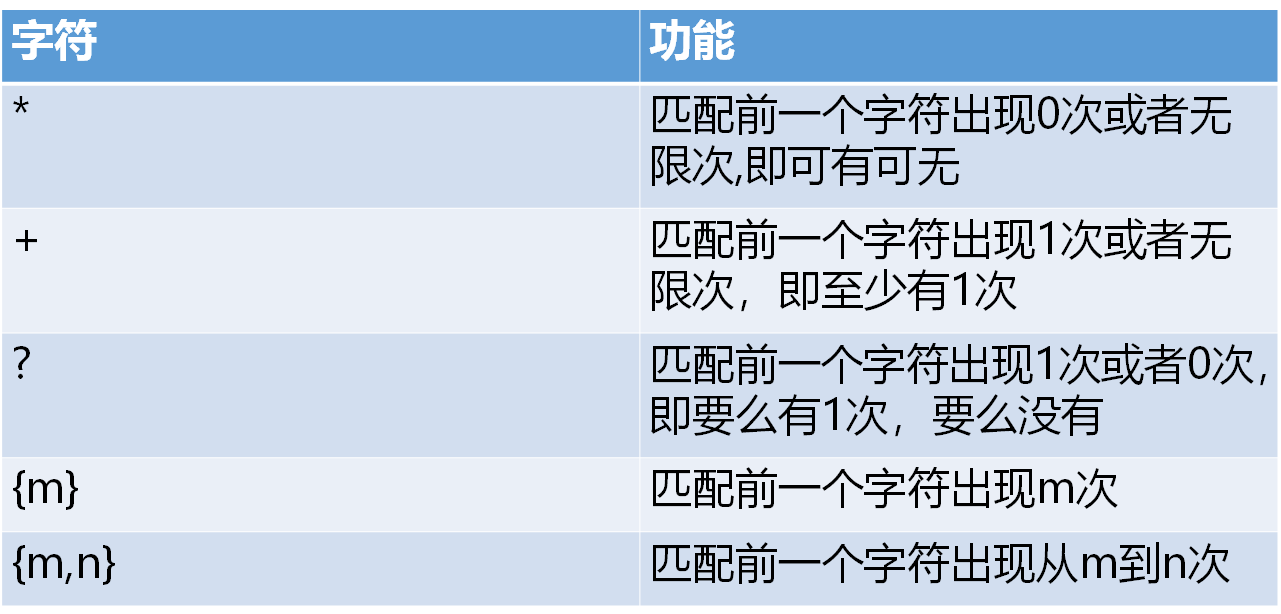

In [ ]:
data1 = re.match(r"哈利波特\d\d","哈利波特11")  # 最笨的方法，只能提取2位的
print(data1.group())

In [ ]:
data1 = re.match(r"哈利波特\d{1,3}","哈利波特11")  # {m,n}对前面单位的规范，可以出现m~n次，可以是1个，可以是2个
print(data1.group())

In [ ]:
data1 = re.match(r"手机\d{11}","手机13888886666")  # {m}对前面单位的规范，可以出现m次，精确查找
print(data1.group())

In [ ]:
# 座机号码：指定区号“-”可有可无
data1 = re.match(r"021-?\d{8}","021-88886666")  # ?对前面的单位进行规范，可有可无，可以出现1次也可以不出现
print(data1.group())
data2 = re.match(r"021-?\d{8}","02188886666")  # ?对前面的单位进行规范，可有可无，可以出现1次也可以不出现
print(data2.group())

In [ ]:
# 座机号码：不指定区号3或4位“-”可有可无 尾号7位或8位
data1 = re.match(r"\d{3,4}-?\d{7,8}","021-88886666")
print(data1.group())
data2 = re.match(r"\d{3,4}-?\d{7,8}","031488886662")
print(data2.group())

In [ ]:
# * 可有可无，可以无限存在，* 规范前面的单位
data3 = '''hello,
武汉加油，
湖北加油，
中国加油
'''
data4 = re.match(r".*",data3)   # .* 可以拿到所有数据，除了换行符，在终端打印的话，可以看到换行符
print(data4.group())

In [ ]:
# * 可有可无，可以无限存在，* 代表前面的单位字符可以不出现，也可以出现一次或者多次(0次、或1次、或多次）)
data3 = '''hello,
武汉加油，
湖北加油，
中国加油
'''
data4 = re.match(r".*",data3,re.S)   # re.S参数 可以拿到所有数据，包括换行符
print(data4.group())

In [ ]:
# runoo+b，可以匹配 runoob、runooob、runoooooob 等，+ 号代表前面的字符必须至少出现一次（1次或多次）
data3 ="runooob"
data2 = "runob"
data4 = re.match(r"runoo+b",data3)   # re.S参数 可以拿到所有数据，包括换行符
data5 = re.match(r"runoo+b",data2)   # re.S参数 可以拿到所有数据，包括换行符
print(data4.group())
print(data5.group())

# 判断开头和结尾

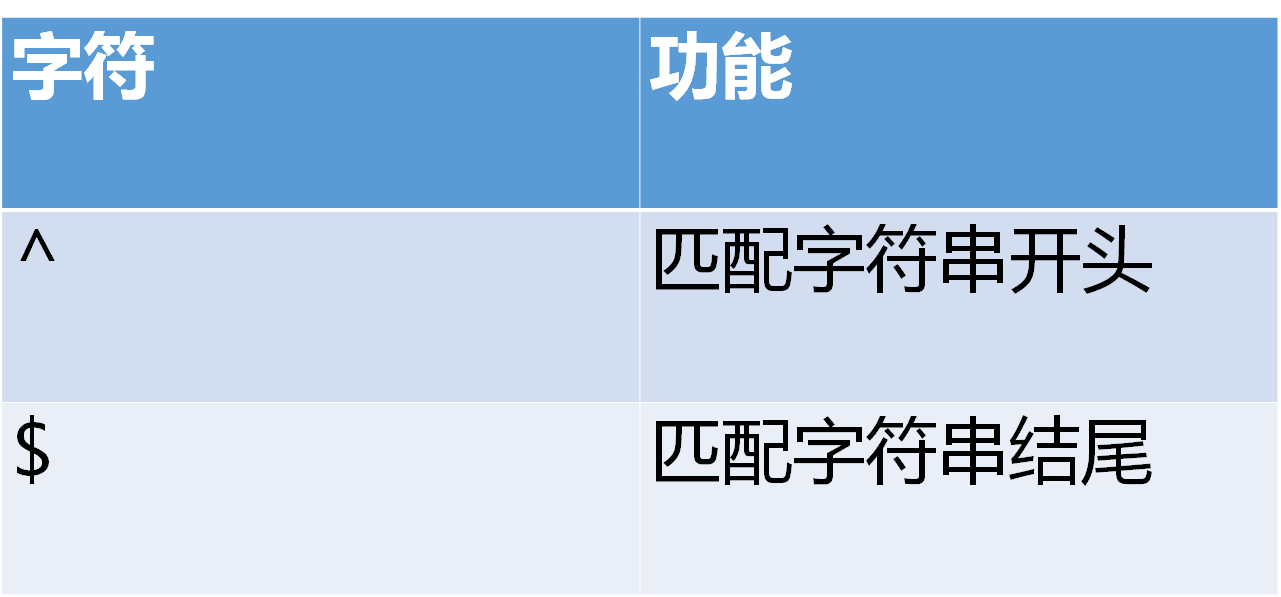

In [ ]:
while True:
    name = input("请输入一个变量名：")
    demo1 = re.match(r"[a-zA-Z_][a-zA-Z0-9_]*",name)
    if demo1:
        print("%s是一个符合规范的变量名" % name)
    else:
        print("%s不是一个符合规范的变量名" % name)

a2adf__###为什么符合？只要前面有符合的，就不对后面的做要求了
所以需要对结尾做限定，即在结尾使用$

In [ ]:
while True:
    name = input("请输入一个变量名：")
    demo1 = re.match(r"[a-zA-Z_][a-zA-Z0-9_]*$",name) # $指定结尾类型
    if demo1: #相当于True
        print("%s是一个符合规范的变量名" % name)
    else:
        print("%s不是一个符合规范的变量名" % name)

In [19]:
# 好比我们要去匹配一个QQ邮箱   XXXXXXX@qq.com
mail = "10853102222@qq.com"
demo1 = re.match(r"\d{5,12}@[qQ]{2}\.com$",mail)  # .符号前的反斜杠代表转译，必须要有，因为在正则里.代表任意字符
print(demo1.group())
# 在一堆数据中找到qq邮箱或者163邮箱
demo2 = re.search(r"[a-zA-Z0-9_]{4,16}@qq|163\.com$",mail)
print(demo2.group()) # 得到的是竖线（竖线代表或）的左侧的数据，所以要给竖线加括号（）
demo2 = re.search(r"[a-zA-Z0-9_]{4,16}@(qq|163)\.com$",mail)
print(demo2.group()) # 括号（）可以对qq和163进行分组，在分组里取任意一个值
print(demo2.group(1)) # 可以在group()函数里传参，来取到第i个分组里的数据，如果有多个分组，可以取多个分组里的数据

10853102222@qq.com
10853102222@qq
10853102222@qq.com
qq


In [20]:
demo_data = "<h1>hello,武汉加油</h1>"  #前后必须一致，产生联系
print(re.match(r"<(\w*)>.*</\1>",demo_data).group()) # \1 代表和第1个分组（）取到的值一样，</\1> 这里必须是\1，如果只写\w是不能保证打印出的结果是<h1></h1>也有可能是<h1></h2>

# 分组太多，可以通过命名方式来匹配
print(re.match(r"<(?P<p1>\w*)>.*</(?P=p1)>",demo_data).group())

<h1>hello,武汉加油</h1>
<h1>hello,武汉加油</h1>


# re的其他操作
re.match()默认自带^

re.search

In [8]:
demo_data = "这个视频的点击量：123456"
print(re.search(r"\d+",demo_data).group()) #search 只能找到第一个数据

123456


In [11]:
demo_data = "这个视频的点击量：123456,下载量：666，转发量：888"
print(re.findall(r"\d+",demo_data)) #findall可以找到所有的数据

['123456', '666', '888']


In [13]:
demo_data = "这个视频的点击量：123456"
print(re.sub(r"\d+","654321",demo_data)) #sub 替换

这个视频的点击量：654321


In [15]:
# 可以通过这种方法实现页面浏览量自增
def add(obj):
    num1 = obj.group()
    num2 = int(num1) + 1
    return str(num2)

demo1 = re.sub(r"\d+",add,"视频点击量为：665")

demo2 = re.sub(r"\d+",add,"视频下载量为：887")

print(demo1)
print(demo2)

视频点击量为：666
视频下载量为：888


In [17]:
demo_data = "hello,武汉加油,湖北加油>中国加油"
print(re.split(r",|>",demo_data))    # 切割，注意要有|

['hello', '武汉加油', '湖北加油', '中国加油']


In [ ]:
# 正则表达式中^的用法
用法一:   限定开头

    文档上给出了解释是匹配输入的开始，如果多行标示被设置成了true，同时会匹配后面紧跟的字符。    比如 /^A/会匹配"An e"中的A，但是不会匹配"ab A"中的A

用法二：（否）取反

    当这个字符出现在一个字符集合模式的第一个字符时，他将会有不同的含义。

    比如： /[^a-z\s]/会匹配"my 3 sisters"中的"3"  这里的”^”的意思是字符类的否定，上面的正则表达式的意思是匹配不是（a到z和空白字符）的字符。 

总结：

什么时候”^”是否定字符，什么时候是匹配开始行

表示限定开头的示例：

1 /[(^\s+)(\s+$)]/g
2 (^cat)$
3 (^cat$)
4 ^(cat)$
5 ^(cat$)

表示否定的示例：

1 [^a]表示“匹配除了a的任意字符”。
2 [^a-zA-Z0-9]表示“找到一个非字母也非数字的字符”。
3 [\^abc]表示“找到一个插入符或者a或者b或者c”。

经过对比，只要是”^”这个字符是在中括号”[]”中被使用的话就是表示字符类的否定，如果不是的话就是表示限定开头。我这里说的是直接在”[]”中使用，不包括嵌套使用。 
其实也就是说”[]”代表的是一个字符集，”^”只有在字符集中才是反向字符集的意思。

In [26]:
demo_data = "catt"
print(re.findall(r"^(cat+$)",demo_data)) #结尾是t开头是cat的cat+

['catt']


In [34]:
demo_data = "caat"
print(re.findall(r"(^ca+t$)",demo_data)) #结尾是t开头是c中间是a的ca+t

['caat']


In [ ]:
demo_data = "caat"
print(re.findall(r"^(cat)$",demo_data)) #结尾是t开头是c中间是a的ca+t

In [38]:
demo_data = "catcat"
print(re.findall(r"^(cat)+$",demo_data)) #结尾是cat开头是cat

['cat']


In [41]:
demo_data = "ccat"
print(re.findall(r"(^c+at)$",demo_data)) #结尾是cat开头是c

['ccat']
